In [1]:
print('hi')

hi


# Improving Computer Vision using Convolutional Neural Networks

### Notebook imports

In [63]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import requests
import cv2
import pandas as pd

### Loading the data

In [8]:
(training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize image data
training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [9]:
print('Shape of data:')
print('Training images shape: ', training_labels.shape)
print('Training labels shape: ', training_labels.shape)
print('Testing images shape: ', testing_images.shape)
print('Testing labels shape: ', testing_labels.shape)

Shape of data:
Training images shape:  (60000,)
Training labels shape:  (60000,)
Testing images shape:  (10000, 28, 28)
Testing labels shape:  (10000,)


# Creating the model without CNN

#### Model

In [17]:
model_without_cnn = keras.Sequential([

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

#### Compiling the model

In [18]:
model_without_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fitting the model

In [19]:
print('Fitting the model')
model_without_cnn.fit(training_images, training_labels, epochs=5)

Fitting the model
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4989 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3749 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3332 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3110 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2928 - accuracy: 0.8919


#### Evaluating the model

In [20]:
print('Evaluating the model')
model_without_cnn.evaluate(testing_images, testing_labels)

Evaluating the model
313/313 [==============================] - 2s 3ms/step - loss: 0.3420 - accuracy: 0.8784


[0.34198233485221863, 0.8784000277519226]

#### Make predictions

In [35]:
predictions = model_without_cnn.predict(testing_images[:10])
index = 0

for prediction in predictions:

    print(f'Prediction: {np.argmax(prediction)} \t Actual: {testing_labels[index]}')
    index = index + 1


1/1 [==============================] - 0s 53ms/step
Prediction: 9 	 Actual: 9
Prediction: 2 	 Actual: 2
Prediction: 1 	 Actual: 1
Prediction: 1 	 Actual: 1
Prediction: 6 	 Actual: 6
Prediction: 1 	 Actual: 1
Prediction: 4 	 Actual: 4
Prediction: 6 	 Actual: 6
Prediction: 5 	 Actual: 5
Prediction: 7 	 Actual: 7


#### Going to see if it can detect other images

In [65]:
classes = pd.Series({'tshirt or top': 0, 'trouser':1, 'pullover':2, 'dress':3, 'coat':4, 'sandal':5, 'shirt':6, 'sneaker':7, 'bag':8, 'ankle boot':9})

In [66]:
# Specify the file path of the image
image_path = 'Bag.webp'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize and preprocess the grayscale image
input_size = (28, 28)  # Example input size from MNIST Fashion dataset
resized_image = cv2.resize(gray_image, input_size)
normalized_image = resized_image / 255.0  # Normalize pixel values

# Convert to tensor and add batch dimension
input_tensor = tf.convert_to_tensor(normalized_image[np.newaxis, ..., np.newaxis])

# Make predictions
predictions = model_without_cnn.predict(input_tensor)
predicted_class = np.argmax(predictions)

# Prediction
print('Predicted class:', predicted_class)
print('Actual class:', classes.loc['bag'])

1/1 [==============================] - 0s 53ms/step
Predicted class: 8
Actual class: 8


# Creating the model with a CNN

#### Building the model

In [78]:
# Improving the model
improved_model = tf.keras.Sequential([

    # Convolution (applying a filter)
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling (max value of every pixel)
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Original layers in the other neural network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

improved_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 800)               0         
                                                                 
 dense_22 (Dense)            (None, 128)             

#### Compiling the model

In [79]:
improved_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fitting the model

In [81]:
improved_model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3036 - accuracy: 0.8889
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2605 - accuracy: 0.9025
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2314 - accuracy: 0.9139
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2083 - accuracy: 0.9216
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1877 - accuracy: 0.9287


In [83]:
print(testing_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 45ms/step


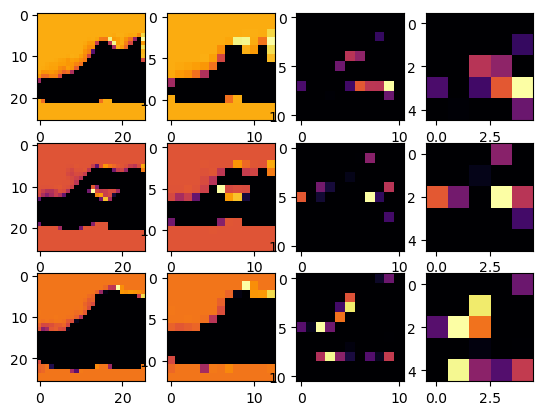

In [87]:
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in improved_model.layers]
activation_model = tf.keras.models.Model(inputs = improved_model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(testing_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(testing_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(testing_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Experimenting with the model

## Editing the number of filters in the convolution

In [89]:
# Editing convolutions
convolutions_edited_model = tf.keras.Sequential([

    # Convolution (applying a filter)
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling (max value of every pixel)
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Original layers in the other neural network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

convolutions_edited_model.summary()
convolutions_edited_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutions_edited_model.fit(training_images, training_labels, epochs=5)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 400)               0         
                                                                 
 dense_26 (Dense)            (None, 128)             

In [91]:
convolutions_edited_model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.2896 - accuracy: 0.8970


[0.2896214723587036, 0.8970000147819519]

### Accuracy goes down when the number of filters decreases

## Removing a convolution

In [92]:
# Editing convolutions
convolution_removed_model = tf.keras.Sequential([

    # Convolution (applying a filter)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling (max value of every pixel)
    tf.keras.layers.MaxPooling2D(2, 2),

    # Original layers in the other neural network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

convolution_removed_model.summary()
convolution_removed_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolution_removed_model.fit(training_images, training_labels, epochs=5)
convolution_removed_model.evaluate(testing_images, testing_labels)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 5408)              0         
                                                                 
 dense_28 (Dense)            (None, 128)               692352    
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_______________________________________________

[0.2563662827014923, 0.911899983882904]